# SD212: Graph mining
## Lab 2: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [31]:
from IPython.display import SVG

In [32]:
import numpy as np
from scipy import sparse

In [33]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [67]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [5]:
n = 10

In [6]:
dataset = linear_graph(n, True)
adjacency = dataset.adjacency
position = dataset.position

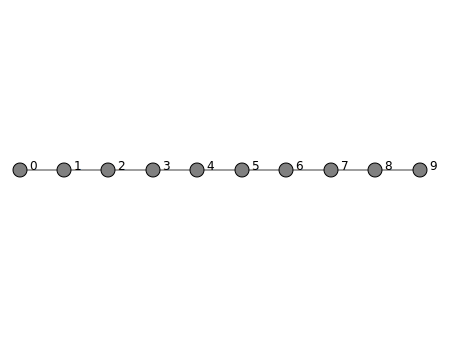

In [7]:
image = svg_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$? You need to compute it!

In [8]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [9]:
scores = pagerank.fit_transform(adjacency)
scores

array([0.06438442, 0.11619864, 0.1093456 , 0.10579102, 0.10428032,
       0.10428032, 0.10579102, 0.1093456 , 0.11619864, 0.06438442])

In [10]:
PageRank(damping_factor=0.6, solver='lanczos').fit_transform(adjacency)

array([0.07500254, 0.11667513, 0.1055787 , 0.10192054, 0.10082309,
       0.10082309, 0.10192054, 0.1055787 , 0.11667513, 0.07500254])

Node 1 and 8 are two best ranked nodes.

In [11]:
di = np.sum(adjacency, axis=1)
P = adjacency/di
P

matrix([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

In [12]:
values, scores = np.linalg.eig(P.T)
values, scores

(array([-1.        , -0.93969262, -0.76604444, -0.5       , -0.17364818,
         0.17364818,  0.5       ,  1.        ,  0.93969262,  0.76604444]),
 matrix([[-0.17149859, -0.25      ,  0.25      ,  0.25      ,  0.25      ,
          -0.25      ,  0.25      ,  0.17149859, -0.25      ,  0.25      ],
         [ 0.34299717,  0.46984631, -0.38302222, -0.25      , -0.08682409,
          -0.08682409,  0.25      ,  0.34299717, -0.46984631,  0.38302222],
         [-0.34299717, -0.38302222,  0.08682409, -0.25      , -0.46984631,
           0.46984631, -0.25      ,  0.34299717, -0.38302222,  0.08682409],
         [ 0.34299717,  0.25      ,  0.25      ,  0.5       ,  0.25      ,
           0.25      , -0.5       ,  0.34299717, -0.25      , -0.25      ],
         [-0.34299717, -0.08682409, -0.46984631, -0.25      ,  0.38302222,
          -0.38302222, -0.25      ,  0.34299717, -0.08682409, -0.46984631],
         [ 0.34299717, -0.08682409,  0.46984631, -0.25      , -0.38302222,
          -0.38302222,

In [13]:
scores[:, 7].T

matrix([[0.17149859, 0.34299717, 0.34299717, 0.34299717, 0.34299717,
         0.34299717, 0.34299717, 0.34299717, 0.34299717, 0.17149859]])

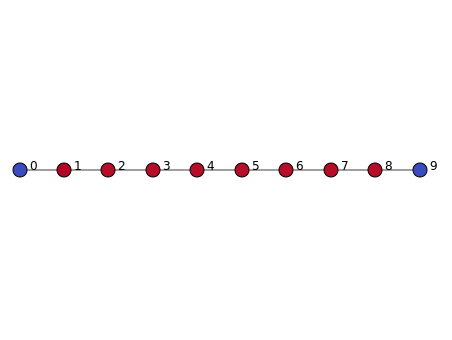

In [14]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=np.asarray(scores[:,7]).flatten())
SVG(image)

## Les Misérables


In [15]:
dataset = miserables(True)

In [16]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

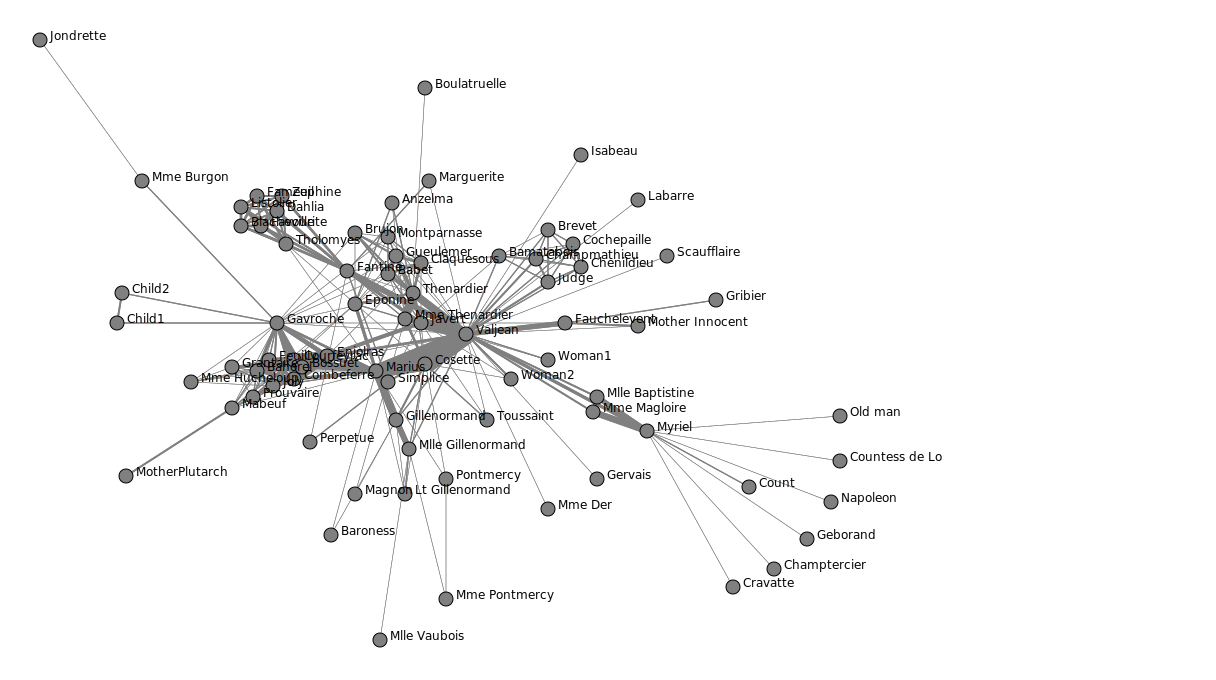

In [17]:
image = svg_graph(adjacency, position, names, scale=2)
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees
    2. the 10 nodes of highest weights
* Try different values of $\alpha$ and interpret the results.

In [18]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [19]:
scores = pagerank.fit_transform(adjacency)

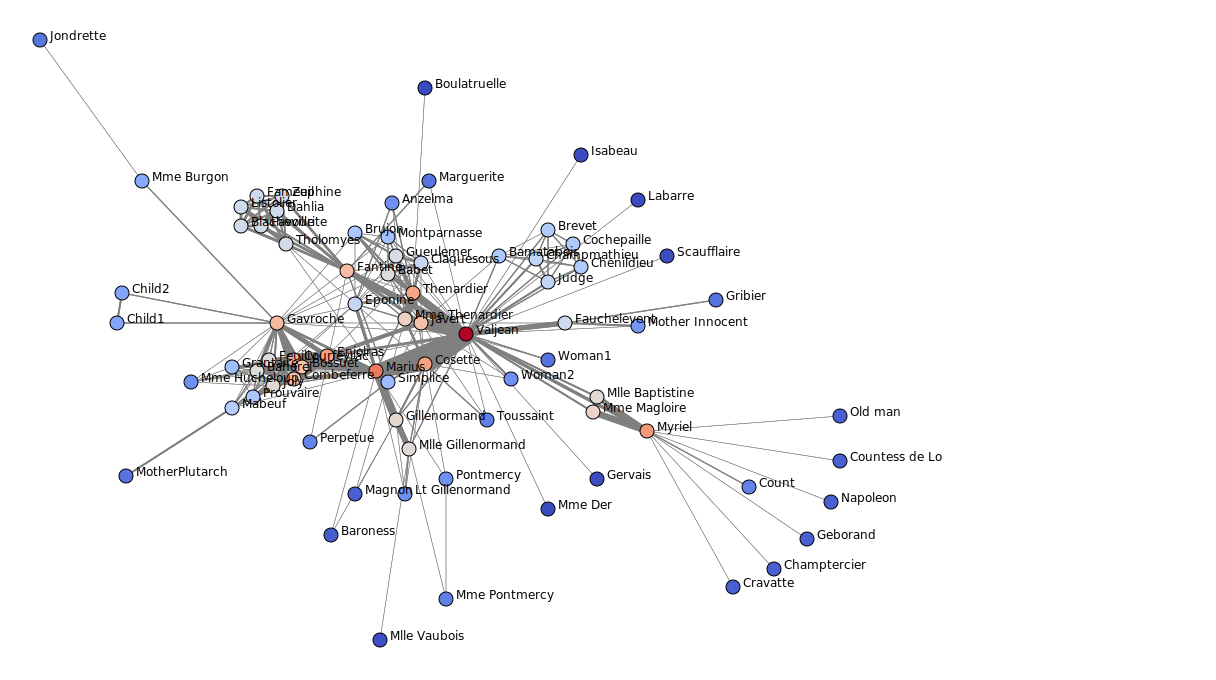

In [20]:
# scores in log scale appear more clearly
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)
SVG(image)

In [21]:
top_nodes = top_k(scores, 10)

In [22]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node], node, scores[node])

1 Courfeyrac 62 0.032998984869745424
2 Valjean 11 0.09955810509325665
3 Thenardier 25 0.035682302516523365
4 Cosette 26 0.036909572835149056
5 Myriel 0 0.039231578436706785
6 Marius 55 0.05166810805410313
7 Enjolras 58 0.03661679901470867
8 Gavroche 48 0.028302635251018674
9 Fantine 23 0.027163508191678877
10 Javert 27 0.02682278338817282


In [23]:
n = len(names)

In [24]:
di = np.asarray(np.sum(adjacency>0, axis=1)).flatten()
order = np.argsort(di)
for i in range(10):
    print(i, names[order==n-i-1])

0 ['Woman2']
1 ['Mother Innocent']
2 ['Fantine']
3 ['Fameuil']
4 ['Perpetue']
5 ['Mlle Vaubois']
6 ['Baroness']
7 ['Mabeuf']
8 ['Enjolras']
9 ['Mme Magloire']


In [25]:
di = np.asarray(np.sum(adjacency, axis=1)).flatten()
order = np.argsort(di)
for i in range(10):
    print(i, names[order==i])

0 ['Feuilly']
1 ['Valjean']
2 ['Gribier']
3 ['Mme Burgon']
4 ['Mme Der']
5 ['Marguerite']
6 ['Labarre']
7 ['Old man']
8 ['Tholomyes']
9 ['Cravatte']


In [26]:
PageRank(damping_factor=0.6, solver='lanczos').fit_transform(adjacency)

array([0.04269004, 0.00602106, 0.01610338, 0.01779445, 0.00602106,
       0.00602106, 0.00602106, 0.00602106, 0.00684732, 0.00602106,
       0.00550378, 0.08136354, 0.00610617, 0.00550378, 0.00550378,
       0.00550378, 0.01309935, 0.01259923, 0.01259923, 0.01292411,
       0.0132457 , 0.01291417, 0.01258933, 0.02359372, 0.01734525,
       0.02989365, 0.02687682, 0.02189857, 0.015201  , 0.01029771,
       0.00696442, 0.00978945, 0.00550378, 0.00609231, 0.01239701,
       0.01239701, 0.01087165, 0.01087165, 0.01087165, 0.00787345,
       0.00548884, 0.01189439, 0.00684019, 0.00663844, 0.0074582 ,
       0.00649775, 0.0072037 , 0.01004446, 0.02461362, 0.01764296,
       0.00586592, 0.01808665, 0.00724132, 0.00566663, 0.00695285,
       0.03678415, 0.00577205, 0.01177926, 0.02493292, 0.01880695,
       0.00883283, 0.01272546, 0.02277394, 0.01382315, 0.01897696,
       0.01437154, 0.00862797, 0.00651997, 0.01375724, 0.01439283,
       0.011759  , 0.00915967, 0.00625763, 0.008941  , 0.00894

In [27]:
PageRank(damping_factor=0.85, solver='lanczos').fit_transform(adjacency)

array([0.03923158, 0.00302376, 0.01740354, 0.01953295, 0.00302376,
       0.00302376, 0.00302376, 0.00302376, 0.00409946, 0.00302376,
       0.00248365, 0.09955811, 0.00346616, 0.00248365, 0.00248365,
       0.00248365, 0.01406847, 0.01316018, 0.01316018, 0.01363256,
       0.01413328, 0.01365813, 0.01318563, 0.02716351, 0.02003922,
       0.0356823 , 0.03690957, 0.02682278, 0.01275456, 0.00891513,
       0.00398663, 0.00728154, 0.00248365, 0.00350434, 0.01133171,
       0.01133171, 0.00935019, 0.00935019, 0.00935019, 0.00449925,
       0.00244526, 0.01154374, 0.00447632, 0.00450131, 0.0048068 ,
       0.00349682, 0.00361375, 0.00587892, 0.02830264, 0.01830535,
       0.00298557, 0.01668045, 0.00383929, 0.0025645 , 0.00460115,
       0.05166811, 0.00290688, 0.00971421, 0.0366168 , 0.02663116,
       0.0086088 , 0.01549424, 0.03299898, 0.01645208, 0.02619494,
       0.01767068, 0.00775314, 0.00349625, 0.01468704, 0.01569995,
       0.01197223, 0.00796869, 0.00389148, 0.00572906, 0.00572

## Openflights


In [35]:
dataset = openflights

In [36]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

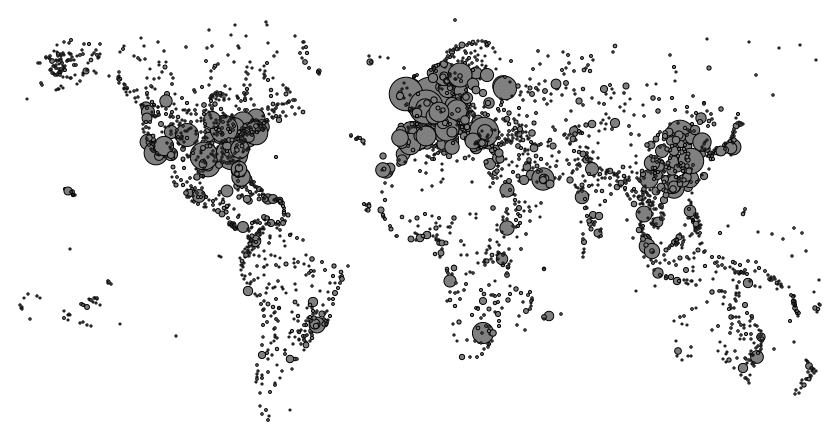

In [30]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [31]:
pagerank = PageRank()

In [32]:
scores = pagerank.fit_transform(adjacency)

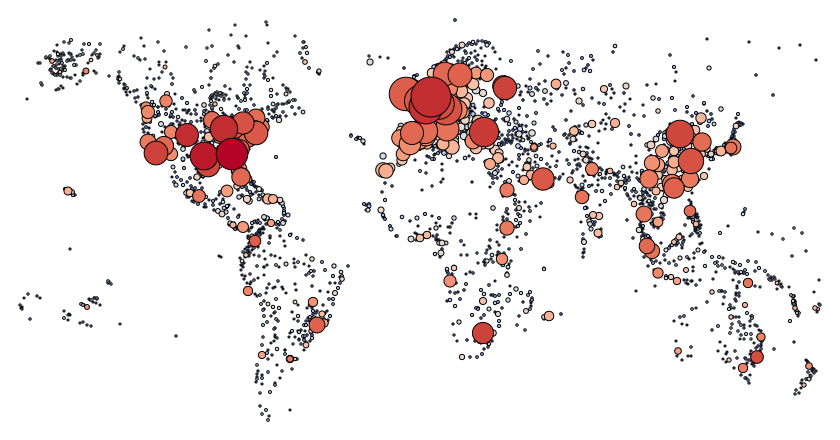

In [33]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [34]:
top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Atatürk International Airport
2 Amsterdam Airport Schiphol
3 Hartsfield Jackson Atlanta International Airport
4 Chicago O'Hare International Airport
5 Charles de Gaulle International Airport
6 Denver International Airport
7 Dallas Fort Worth International Airport
8 OR Tambo International Airport
9 Los Angeles International Airport
10 Domodedovo International Airport


In [35]:
traffic = np.asarray(np.sum(adjacency>0, axis=1) + np.sum(adjacency.T>0, axis=1)).flatten()

In [36]:
order = np.argsort(traffic)
order

array([3096, 2544, 2542, ...,  280,  622,  189], dtype=int64)

In [37]:
for i in range(10):
    print(i, names[order==i])

0 ['Austin Straubel International Airport']
1 ['Sary-Arka Airport']
2 ['Heringsdorf Airport']
3 ['Gamal Abdel Nasser Airport']
4 ['Anaktuvuk Pass Airport']
5 ['Will Rogers World Airport']
6 ['Sharm El Sheikh International Airport']
7 ['Muskrat Dam Airport']
8 ['Uray Airport']
9 ['Dionysios Solomos Airport']


In [38]:
int(np.where(np.char.find(names, 'Tokyo')>=0)[0])

1084

In [38]:
int(np.where(np.char.find(names, 'Charles de Gaulle')>=0)[0])

622

In [40]:
np.where(np.char.find(names, 'Beijing')>=0)

(array([1618, 2715], dtype=int64),)

In [42]:
names[1618]

'Beijing Capital International Airport'

In [43]:
names[2715]

'Beijing Nanyuan Airport'

In [46]:
u = np.zeros(len(names))
u[622] = 2
u[1618] = 1

In [44]:
scores = pagerank.fit_transform(adjacency, u)
scores

NameError: name 'pagerank' is not defined

In [39]:
u = np.zeros(len(names))
u[1084] = 1

In [47]:
scores = PageRank().fit_transform(adjacency, u)
scores

array([1.24288921e-05, 1.73135094e-05, 3.84990225e-05, ...,
       6.91832515e-06, 2.08336043e-05, 1.59761620e-05])

In [49]:
top_k(scores, k=3)

array([ 622, 1618,  280], dtype=int64)

In [50]:
names[280]

'Amsterdam Airport Schiphol'

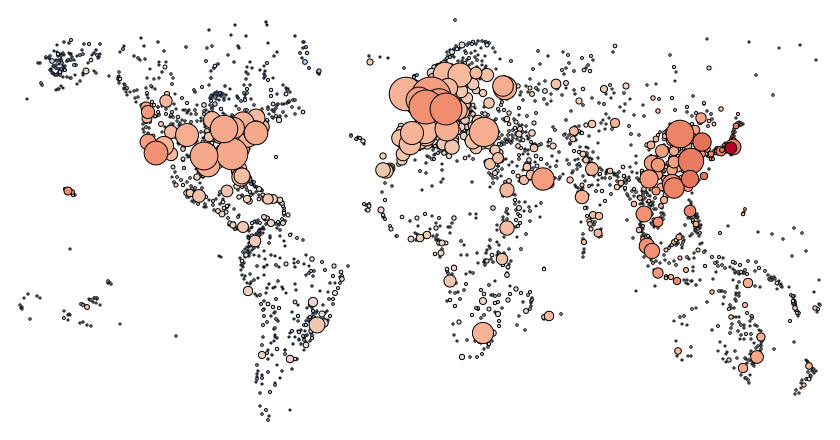

In [41]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

In [42]:
top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Incheon International Airport
2 Naha Airport
3 New Chitose Airport
4 Osaka International Airport
5 Taiwan Taoyuan International Airport
6 Shanghai Pudong International Airport
7 Tokyo Haneda International Airport
8 Kansai International Airport
9 Narita International Airport
10 Chubu Centrair International Airport


## 2. Directed graphs

## Wikipedia Vitals

In [43]:
dataset = wikivitals

In [59]:
dataset

{'adjacency': <10011x10011 sparse matrix of type '<class 'numpy.bool_'>'
 	with 824999 stored elements in Compressed Sparse Row format>,
 'biadjacency': <10011x37845 sparse matrix of type '<class 'numpy.int64'>'
 	with 1363301 stored elements in Compressed Sparse Row format>,
 'labels': array([5, 5, 2, ..., 3, 6, 5], dtype=int64),
 'labels_hierarchy': array([ 930,  930,  534, ...,  637, 1170,  930], dtype=int64),
 'meta': {'name': 'Wikivitals (en)',
  'description': 'Vital articles of Wikipedia in English (level 4) with links between them and words used in summaries (tokenization by Spacy, model "en_core_web_lg").',
  'source': 'https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4',
  'date': 'June 2021'},
 'names': array(['0', '1', '100 metres', ..., 'Łódź', 'Śāriputra', '−1'],
       dtype='<U62'),
 'names_col': array(['Alexis', 'Cairo', 'subordinate', ..., 'parody', 'martyrdom',
        'Wyler'], dtype='<U26'),
 'names_labels': array(['Arts', 'Biological and health science

In [44]:
adjacency = dataset.adjacency
names = dataset.names

In [45]:
names

array(['0', '1', '100 metres', ..., 'Łódź', 'Śāriputra', '−1'],
      dtype='<U62')

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [46]:
scores = pagerank.fit_transform(adjacency)
top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 India
2 Latin
3 China
4 Geographic coordinate system
5 The New York Times
6 France
7 World War II
8 United States
9 United Kingdom
10 World War I


In [47]:
in_degree = np.array(adjacency.sum(axis=0)).flatten()
top_nodes = top_k(in_degree, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 The New York Times
2 India
3 France
4 China
5 Geographic coordinate system
6 World War II
7 United States
8 United Kingdom
9 Latin
10 Australia


In [48]:
out_degree = np.array(adjacency.sum(axis=1)).flatten()
top_nodes = top_k(out_degree, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 France
2 Biology
3 Asia
4 Human history
5 Latin America
6 Europe
7 Africa
8 South America
9 History of art
10 Human


Top 20 of PageRank and in-degree

In [49]:
scores = pagerank.fit_transform(adjacency)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 India
2 Latin
3 China
4 Geographic coordinate system
5 The New York Times
6 France
7 World War II
8 United States
9 United Kingdom
10 Canada
11 Russia
12 Germany
13 Italy
14 Australia
15 World War I
16 Greek language
17 Japan
18 Spain
19 Christianity
20 Europe


In [50]:
in_degree = np.array(adjacency.sum(axis=0)).flatten()
top_nodes = top_k(in_degree, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Germany
2 World War II
3 France
4 China
5 Geographic coordinate system
6 United Kingdom
7 Australia
8 Latin
9 The New York Times
10 United States
11 Italy
12 India
13 Russia
14 Canada
15 Spain
16 World War I
17 Japan
18 Christianity
19 Europe
20 Egypt


Greek language is not in the top 20 in-degree

## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. Who is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>
**Hint:** Consider the difference between two PageRank scores.

In [53]:
type(names)

numpy.ndarray

In [58]:
np.argwhere(np.char.find(names, 'Picasso')>=0)

array([[3738],
       [6736]], dtype=int64)

In [60]:
names[np.char.find(names, 'Picasso')>=0]

array(['Guernica (Picasso)', 'Pablo Picasso'], dtype='<U62')

In [62]:
labels = dataset.labels
labels

array([5, 5, 2, ..., 3, 6, 5], dtype=int64)

In [63]:
labels[6736]

6

In [66]:
dataset.labels_hierarchy[6736]

1227

In [67]:
dataset.names_labels_hierarchy[1227]

'People|||Visual artists|||Western painters and illustrators|||Modern era'

In [73]:
np.argwhere(np.char.find(dataset.names_labels_hierarchy, 'painter')>=0)

array([[1225],
       [1226],
       [1227],
       [1228]], dtype=int64)

In [74]:
u = np.zeros(adjacency.shape[0])
u[6736] = 1
scores = pagerank.fit_transform(adjacency, u)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Pablo Picasso
2 World War II
3 The New York Times
4 World War I
5 Surrealism
6 Modernism
7 Cubism
8 Romanticism
9 Paris
10 Museum of Modern Art
11 Impressionism
12 Symbolism (arts)
13 Metropolitan Museum of Art
14 Modern art
15 Post-Impressionism
16 Paul Cézanne
17 Time (magazine)
18 United States
19 Vincent van Gogh
20 Dada


In [78]:
np.argwhere(np.char.equal(names, 'Cat')==1)

array([[1497]], dtype=int64)

In [79]:
np.argwhere(np.char.equal(names, 'Dog')==1)

array([[2468]], dtype=int64)

In [80]:
u = np.zeros(adjacency.shape[0])
u[1497] = 1/2
u[2468] = 1/2
scores = pagerank.fit_transform(adjacency, u)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Cat
2 Animal
3 Dog
4 Mammal
5 Taxonomy (biology)
6 Chordate
7 Leopard
8 Carl Linnaeus
9 Latin
10 Pinniped
11 Lion
12 World War II
13 Carnivora
14 Brown bear
15 Polar bear
16 Hyena
17 Fox
18 Coyote
19 Bear
20 Jaguar


## To do

* List 5 representative articles of each category.

In [81]:
labels = dataset.labels
names_labels = dataset.names_labels

In [83]:
names_labels

array(['Arts', 'Biological and health sciences', 'Everyday life',
       'Geography', 'History', 'Mathematics', 'People',
       'Philosophy and religion', 'Physical sciences',
       'Society and social sciences', 'Technology'], dtype='<U30')

In [85]:
scores = pagerank.fit_transform(adjacency)
i = 0
for category in names_labels:
    top_nodes = top_k(scores[labels==i], 5)
    i = i + 1
    print('\nTop 5 articles in ', category)
    j = 0
    for node in top_nodes:
        j = j + 1
        print(j, names[node])


Top 5 articles in  Arts
1 Ahvaz
2 Ambulance
3 Analytical chemistry
4 Animal husbandry
5 Abstraction

Top 5 articles in  Biological and health sciences
1 Abu Hanifa
2 Cali
3 Blues
4 Adolescence
5 Biomechanics

Top 5 articles in  Everyday life
1 Abbas the Great
2 Ali
3 A Sunday Afternoon on the Island of La Grande Jatte
4 Adi Shankara
5 Abbas Kiarostami

Top 5 articles in  Geography
1 Blackcurrant
2 Albert A. Michelson
3 American bison
4 Anger
5 Amaryllis

Top 5 articles in  History
1 Artist
2 Artillery
3 Arabidopsis thaliana
4 Andalusia
5 Antwerp

Top 5 articles in  Mathematics
1 Aldehyde
2 Ahmad ibn Hanbal
3 Alexis of Russia
4 Adult
5 Adhesive

Top 5 articles in  People
1 Category theory
2 African Union
3 Ballad
4 Absolute zero
5 Air mass

Top 5 articles in  Philosophy and religion
1 Abraham Maslow
2 Airline
3 Abu Nuwas
4 Absorption spectroscopy
5 Agra

Top 5 articles in  Physical sciences
1 Astronomy
2 Alfred North Whitehead
3 Antigua and Barbuda
4 Afonso de Albuquerque
5 Attention



## 3. Bipartite graphs

## Cinema

In [68]:
dataset = cinema

In [70]:
dataset

{'biadjacency': <88440x44586 sparse matrix of type '<class 'numpy.bool_'>'
 	with 304006 stored elements in Compressed Sparse Row format>,
 'meta': {'name': 'cinema',
  'source': 'https://yago-knowledge.org',
  'description': 'Graph between movies and actors.'},
 'names_col': array(['Joe E. Brown', 'Eric Blore', 'Susan Hayward', ...,
        'Olivier Saladin', 'Reona Hirota', 'Leyla Sayar'], dtype='<U95'),
 'names_row': array(['$1,000 a Touchdown', '$9.99', '$', ...,
        'Šta se zgodi kad se ljubav rodi', 'Želary', '’O Re'], dtype='<U95')}

In [69]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

In [88]:
dataset

{'biadjacency': <88440x44586 sparse matrix of type '<class 'numpy.bool_'>'
 	with 304006 stored elements in Compressed Sparse Row format>,
 'meta': {'name': 'cinema',
  'source': 'https://yago-knowledge.org',
  'description': 'Graph between movies and actors.'},
 'names_col': array(['Joe E. Brown', 'Eric Blore', 'Susan Hayward', ...,
        'Olivier Saladin', 'Reona Hirota', 'Leyla Sayar'], dtype='<U95'),
 'names_row': array(['$1,000 a Touchdown', '$9.99', '$', ...,
        'Šta se zgodi kad se ljubav rodi', 'Želary', '’O Re'], dtype='<U95')}

## To do


* List the 5 closest actors and the 5 closest movies to **Catherine Deneuve**.

In [78]:
dataset

{'biadjacency': <88440x44586 sparse matrix of type '<class 'numpy.bool_'>'
 	with 304006 stored elements in Compressed Sparse Row format>,
 'meta': {'name': 'cinema',
  'source': 'https://yago-knowledge.org',
  'description': 'Graph between movies and actors.'},
 'names_col': array(['Joe E. Brown', 'Eric Blore', 'Susan Hayward', ...,
        'Olivier Saladin', 'Reona Hirota', 'Leyla Sayar'], dtype='<U95'),
 'names_row': array(['$1,000 a Touchdown', '$9.99', '$', ...,
        'Šta se zgodi kad se ljubav rodi', 'Želary', '’O Re'], dtype='<U95')}

In [77]:
from sknetwork.path import get_distances, get_diameter, get_shortest_path
get_distances(biadjacency, sources=3465+44586)

ValueError: inconsistent shapes

In [75]:
biadjacency.shape

(88440, 44586)

In [74]:
np.argwhere(np.char.find(actors, 'Kevin Bacon')>=0)

array([[3465]], dtype=int64)

In [94]:
actors.shape

(44586,)

In [95]:
from sknetwork.utils import bipartite2undirected
adjacency = bipartite2undirected(biadjacency)
u = np.zeros(adjacency.shape[0])
u[2173+movies.shape[0]] = 1
scores = pagerank.fit_transform(adjacency, u)

In [98]:
print('Top 5 closest actors: ')
top_nodes = top_k(scores[movies.shape[0]:], 5)
for i, node in enumerate(top_nodes):
    print(i + 1, actors[node])

Top 5 closest actors: 
1 Gérard Depardieu
2 Marcello Mastroianni
3 Catherine Deneuve
4 Michel Piccoli
5 Chiara Mastroianni


In [99]:
print('Top 5 closest movies: ')
top_nodes = top_k(scores[0:movies.shape[0]], 5)
for i, node in enumerate(top_nodes):
    print(i + 1, movies[node])

Top 5 closest movies: 
1 The Umbrellas of Cherbourg
2 Standing Tall
3 The Beloved (2011 film)
4 A Christmas Tale
5 In the Courtyard


## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

### Wikipedia Vitals

In [5]:
dataset = wikivitals

In [6]:
adjacency = dataset.adjacency
names = dataset.names

In [8]:
biadjacency = dataset.biadjacency

## To do

Do the same experiments as above and compare both rankings:
* List the 10 best ranked pages of Wikipedia Vitals. 
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In [9]:
dataset

{'adjacency': <10011x10011 sparse matrix of type '<class 'numpy.bool_'>'
 	with 824999 stored elements in Compressed Sparse Row format>,
 'biadjacency': <10011x37845 sparse matrix of type '<class 'numpy.int64'>'
 	with 1363301 stored elements in Compressed Sparse Row format>,
 'labels': array([5, 5, 2, ..., 3, 6, 5], dtype=int64),
 'labels_hierarchy': array([ 930,  930,  534, ...,  637, 1170,  930], dtype=int64),
 'meta': {'name': 'Wikivitals (en)',
  'description': 'Vital articles of Wikipedia in English (level 4) with links between them and words used in summaries (tokenization by Spacy, model "en_core_web_lg").',
  'source': 'https://en.wikipedia.org/wiki/Wikipedia:Vital_articles/Level/4',
  'date': 'June 2021'},
 'names': array(['0', '1', '100 metres', ..., 'Łódź', 'Śāriputra', '−1'],
       dtype='<U62'),
 'names_col': array(['Alexis', 'Cairo', 'subordinate', ..., 'parody', 'martyrdom',
        'Wyler'], dtype='<U26'),
 'names_labels': array(['Arts', 'Biological and health science

In [11]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [14]:
scores = pagerank.fit_transform(adjacency)
top_nodes = top_k(scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 United States
2 Geographic coordinate system
3 Latin
4 World War II
5 The New York Times
6 India
7 China
8 France
9 United Kingdom
10 World War I


In [15]:
bi_scores = pagerank.fit_transform(biadjacency)
top_nodes = top_k(bi_scores, 10)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 World War I
2 Eastern Bloc
3 Vietnam War
4 Soviet Union
5 Orphanage
6 Lyndon B. Johnson
7 History of Germany
8 Piano
9 Italian Wars
10 Spanish conquest of the Aztec Empire


In [17]:
u = np.zeros(adjacency.shape[1])
u[6736] = 1
scores = pagerank.fit_transform(adjacency, u)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Cubism
2 World War II
3 Modernism
4 Museum of Modern Art
5 Post-Impressionism
6 Romanticism
7 Vincent van Gogh
8 United States
9 Surrealism
10 The New York Times
11 Paul Cézanne
12 Metropolitan Museum of Art
13 Pablo Picasso
14 World War I
15 Impressionism
16 Time (magazine)
17 Modern art
18 Paris
19 Dada
20 Symbolism (arts)


In [20]:
u = np.zeros(biadjacency.shape[0])
u[6736] = 1
bi_scores = pagerank.fit_transform(biadjacency, u)
top_nodes = top_k(bi_scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Modern art
2 Guernica (Picasso)
3 Les Demoiselles d'Avignon
4 Henri Matisse
5 Pablo Picasso
6 Joan Miró
7 Dada
8 Collage
9 Cubism
10 Marc Chagall
11 Marcel Duchamp
12 Metropolis (1927 film)
13 Paul Gauguin
14 Alberto Giacometti
15 Jean-Auguste-Dominique Ingres
16 Kazimir Malevich
17 Tristan Tzara
18 Adolescence
19 African art
20 Paul Cézanne


In [21]:
u = np.zeros(adjacency.shape[0])
u[1497] = 1/2
u[2468] = 1/2
scores = pagerank.fit_transform(adjacency, u)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Hyena
2 Dog
3 Polar bear
4 Animal
5 Taxonomy (biology)
6 Chordate
7 Pinniped
8 Bear
9 Fox
10 Latin
11 Coyote
12 Leopard
13 Cat
14 Carnivora
15 Carl Linnaeus
16 Lion
17 Mammal
18 World War II
19 Brown bear
20 Jaguar


In [22]:
u = np.zeros(adjacency.shape[0])
u[1497] = 1/2
u[2468] = 1/2
scores = pagerank.fit_transform(biadjacency, u)
top_nodes = top_k(scores, 20)
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Pet
2 Domestication
3 Morphology (linguistics)
4 Hunting
5 Siamese cat
6 Coyote
7 Cougar
8 Domestic short-haired cat
9 Felidae
10 Dog
11 Wolf
12 Smilodon
13 Mouse
14 Carnivora
15 Canidae
16 Cat
17 Retriever
18 Gallic Wars
19 Rabies
20 German Shepherd


In [6]:
dataset = openflights

In [7]:
dataset

{'adjacency': <3097x3097 sparse matrix of type '<class 'numpy.int64'>'
 	with 36386 stored elements in Compressed Sparse Row format>,
 'meta': {'name': 'openflights',
  'description': 'Airports with daily number of flights between them.',
  'source': 'https://openflights.org'},
 'names': array(['Goroka Airport', 'Madang Airport', 'Mount Hagen Kagamuga Airport',
        ..., 'Saumlaki/Olilit Airport', 'Tarko-Sale Airport',
        'Alashankou Bole (Bortala) airport'], dtype='<U65'),
 'position': array([[145.39199829,  -6.08168983],
        [145.78900147,  -5.20707989],
        [144.29600525,  -5.82678986],
        ...,
        [131.30599976,  -7.98860979],
        [ 77.81809998,  64.93080139],
        [ 82.3       ,  44.895     ]])}

In [14]:
dataset.names[np.argwhere(np.char.find(dataset.names, 'Charles')>=0)]

array([['Sir Charles Gaetan Duval Airport'],
       ['Charles de Gaulle International Airport'],
       ['George F. L. Charles Airport'],
       ['Lake Charles Regional Airport'],
       ['Charleston Air Force Base-International Airport'],
       ['Charles M. Schulz Sonoma County Airport']], dtype='<U65')

In [23]:
np.argwhere(np.char.find(dataset.names, 'Peawanuck Airport')>=0)

array([[2277]], dtype=int64)

In [17]:
from sknetwork.path import get_distances

In [26]:
dist = get_distances(openflights.adjacency>0, sources=622)

In [27]:
top_k(dist, k=1)

array([2277], dtype=int64)

In [28]:
dist[2222]

5.0

In [29]:
dataset.names[2222]

'Alluitsup Paa Heliport'

In [30]:
dist[2277]

7.0

In [25]:
dist[622]

0.0

In [53]:
dataset= wikivitals
adjacency = dataset.adjacency
names = dataset.names

In [61]:
np.where(np.char.find(names, 'Egypt')==0)

(array([2680, 2681, 2682, 2683, 2684], dtype=int64),)

In [62]:
names[np.where(np.char.find(names, 'Egypt')==0)]

array(['Egypt', 'Egyptian Arabic', 'Egyptian hieroglyphs',
       'Egyptian language', 'Egyptian mythology'], dtype='<U62')

In [63]:
france = 3233
japan = 4690
egypt = 2680

In [65]:
boo_adj = (adjacency>0)
count = np.sum(boo_adj[:, [france, japan, egypt]], axis=1)

In [66]:
np.sum(count==3)

185